# MNIST model Tester

## Design criteria

Before we jump in to design discussions, here are some cavets!

- I'm not a UI developer or a Python Ninja! (yet :))
- I know using Wt (C++ lib) to build the Web application is not the best way to go for this application.

With this excercise I'm trying to demonstrate my skills which I'm good at and improve my skills on the other programming languages and try to build better each time. I would love to build a web app using python flask or nodejs or Anjularjs. But those are not my strengths, my strength lies in C++ and hence I opted for Wt as choice of web app development for this excercise. I had little experience developing Web app using Wt. I developed a tool called [Spookfish](https://github.com/Santhosh-KS/spookfish) which has won [second prize](https://www.learnopencv.com/cv4faces-best-project-award-fall-2018/) in the computer vision for faces course. I've borrowed bit of UI code from my spookfish project. So instead of spending time in learning new technology in 4 days of time and build half cooked app, I rather chose to build a good quality app with my current strengths. 

With these caveats in mind lets dive in to the design aspects.

Before that, if you have not seen the [quick demo](https://www.youtube.com/watch?v=rRr-dCAFBMk&feature=youtu.be). Please watch it now before you proceed.

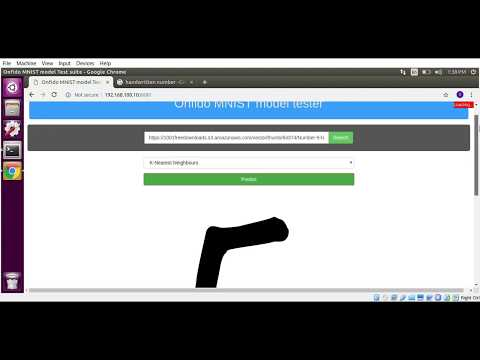

In [8]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('rRr-dCAFBMk')

Here is the list of things which will be there in my mind when I try to build any software.

- Simplicity and Ease of Use.(For UI)
- Modular and maintainable code.
- Scalability.

Let me explain them in detail here.

### Simplicity

I'm a big fan of Apple products. I love their design. They design things so simple but yet so powerful. Apple design is very user friendly. Yet I don't own an Apple device! :) 

Jokes apart. When it comes to user experience with UI, over the years, I've learnt to keep it simple. For example when you load the web app, there is nothing more you can do. It just has two widgets. One input field and second is just a button. This helps the user to focus on what he/she needs to do. Just put some valid error handling on those fields. This simple approach will remove lot of clutter in your code. Just enabling the complete webpage and asking user to fill in the details will always open a can of worms in the code. So I tried to keep the UI simple and effective for the user.


### Modular and maintainable code.

When I thought of building this web app, I wanted it to be reuseable. The models which we are testing in this example might be MNIST models. But this could be any generic model. If we hardcode the model names as part of the code then again we have to re-visit the code and compile and test etc. Which is very time consuming effort. To solve this kind of problem I've divided the design in three parts.

- Client and server code 
- UI dependency code.
- Serve side of the code

I've kept the client and server code separate as these could be used and tested independently of any other components. You can find the example standalone code in **[example](https://github.com/Santhosh-KS/mnistModelTester/tree/master/example)** directory.

Wanted to keep the UI dependency as much minimal as possible. Hence kept the URL parser and Model combo box selector separate.

Because I've kept the URL parser separete the URL's can be tested independently. This will help us to do do exclusive testing on the input URL from the user.**[unittests](https://github.com/Santhosh-KS/mnistModelTester/tree/master/unitTests)** 

This also helps to stick with our simplicity principle which we discussed earlier.

If we look at the UI closely, to make the UI more re-usable we need to identify the constant and variable fields in the UI. Here is the list of componets in the UI.

#### Constant fields.
- Search Line edit field.
- Search Button.
- Predict Button.
- Window to display the image.

#### Variable field.
- Dropdown menu to select the models.

As we can see we are able to identify the variable field of our UI design, **Dropdown menu** is the only variable rest of the things can be kept constant!
Here is how I tried to keep the dependencies on the Dropdown menu out of UI's C++ code. I created a [Models.json](https://github.com/Santhosh-KS/mnistModelTester/blob/master/deploy/data/Models.json) file

Here is  how the simple json file looks like
```
 {
    "Models": ["Logistic Regression", "K-Nearest Neighbours", "CNN Keras Model"]
}

```
Now if we want to add a new model to test say "CNN with 10 hidden layers" in to the UI, all we need to do is just edit the Models.json file rest of the things are taken care automatically on the client side of the code. 
```
 {
    "Models": ["Logistic Regression", "K-Nearest Neighbours", "CNN Keras Model", "CNN with 10 hidden layers"]
}

```

Ofcourse you need to add the support for the new model on the server side. Which you have to do in any case. Keeping the models in Models.json file makes the code lightweight and much more easily maintainable and re-usable.

Server side of the code just parses the json request sent by client and calls an internal python modules. This is bascially my limitation which I've to workthrough. Currently I'm not completely aware of how to build the ML Models using C++ and most of the ML models are built using Python. And Python has a wide set of libraries available, which will take a lifetime for me alone to build all of it by myself. Hence I've made a compromise of calling a python code as script called [modelLoader.py](https://github.com/Santhosh-KS/mnistModelTester/blob/master/deploy/scripts/modelLoader.py). This python module does all the heavy lifting. 

As we can see I try to incorporate my design principles as much as possible by keeping the code modular.


### Scalability

When we want to build a software or extend the features of the software we need to understand the bottlenecks of the system. Here are the few bottlenecks which can appear in any software for that matter.

- CPU
- Memory
- Disk I/O
- Network I/O

If we have a clear understanding of our system/software we will certainly be able to categorize the Scalabality problems in to above mentioned four types.
To make the current solution scalable to thousands of the requests per day we need to know the bottlenecks in our current solution. So let us try to understand the current limitations of the code in this assignment, which is mainly related to the Disk I/O related problems. Let me explain it in detail.

- Performance of the [modelLoader.py](https://github.com/Santhosh-KS/mnistModelTester/blob/master/deploy/scripts/modelLoader.py)

In this script I'm storing the each image URL's in to the disk and then reading it again. Ideally we shouldn't be doing lot of I/O operations. This will have very bad user experience. If a user gives a huge image of >50MB then we are going to waste few seconds writing it to the disk and few more seconds reading it back. This will ultimately show up as delay in gettting the end prediction on the UI.

I would have written a code which would avoid the reading and writing of images to the disk. But that comes with the cost of time and complexity of the code. It would take longer time to handle different image formats and need to put in lot of effort in keeping it modular. This is the compromise which I've made in my current design.

- Dynamically loaded ML models.

In our current design we are currently loading and unloading the stored models aka .pkl files or .h5 files. This again incurs more I/O on the system which results in delayed response.

This again can be avoided by loading all the models only once and just predict the given image. Which means more C++/Python modules running in parallel to handle such situations.

These are the two major bottlenecks which will hinder our scalability aspect of our design. But I have tried to give a fair explanation on why I've done what I've done in the current code.

Network I/O issue can be easily addressed by having the server hosted on multiple Hardware and using a load balancer to route the traffic depending on the amount of traffic seen on our portal.

Also a caching mechanism to remember the previously shared image URL will help in retrieving the results faster.

Here are some generic gotchas to keep in mind when we think of scalability.

- Store results of common operations so you're not repeating work 
- Avoid doing complex operations in the request-response cycle
- Don't make requests from the client for things it already has.

### Monitoring the performance of our model.

One easiest thing to do is to run the test image on perfect ML model with the Model we are testing.

Ex:

|#|URL|Perfect Model Prediction| Test Model prediction|
|--|---|------------------------|-----|
|1|http://1.png| 1 | 1|
|2|http://6.png| 6 | 5|
|1|http://7.png| 7 | 9|
|1|http://2.png| 2 | 2|

Here we are showing it as table. Same table can be stored in a Database. We can compare the results which we see over a period of time to monitor the performance of our model.

The above method assumes we already have some perfect model. For example MNIST data model. There are n-number of models which can give 100% accuracy. We can compare our model against those models. 
But what if we don't have those perfect models? I'm not sure. May be we can try some image agumentation.

For example here is the list of sample **image agumentation** we can do.
- rotate the image say about $5\,^{\circ}$ to the left or $5\,^{\circ}$ to the right
- Add a slight blurring effect on the image.
- Add some random noise on the image.
- Slightly crop the image. without losing the digits in the center.
- Dilate/errode the image
etc. 

There is no limit on the options available on image augumentation.

**NOTE**: We need to be extremly careful about what type of augmentation we are doing on MNIST kind of data set. For example, we should not do flip or rotate on the MNIST data set or the dataset where we are trying to classify the text. If we rotate an image of **6 by $180\,^{\circ}$ vertically then image becomes 9**. Which is not correct. Similarly if we flip digit **7** horizontally/vertically it loses its meaning. So we need to be careful in identifying the type of augmentation which are willing to apply on the images.

Apply the above mentioned augmentation methods on the image and feed it to the ML model for a period of time and randomly sample those results and pass the same images to check the current prediction and validate it with its previous values?

Not completely sure how that will really help. But my gut feeling says it could work :)

But Image augmentation will cetainly help if have very small dataset as our current model ML MNIST predictor with 500 samples in it. I wish I had little more time to complete the task, I would have definitely tried it.

Here is the accuracy of my models.

|#|Model|Accuracy|
|-|-----|--------|
|1|Logistic Regression| 81%|
|2|KNN| 80%|
|3|CNN|60-77%|

Deploying the ML model was something new to me and I learnt how to do it with the help of this assignment. I had trouble getting the CNN keras model to be deployed and loaded on my system. Found lot of things which doesn't work :) But ultimately I put it all together and made it work but it came at the cost of no unit testing on the python module. 

If I had more time, I would have done the [modelLoader.py](https://github.com/Santhosh-KS/mnistModelTester/blob/master/deploy/scripts/modelLoader.py) more modular and added python unit tests on the same.